# 0. Car sales in Norway - emissions and trends

### a. Do some EDA with info, find out column names, shape of dataset, describe method to get summary descriptive statistics.

In [19]:
import pandas as pd
import duckdb
import matplotlib as plt

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")
df.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


In [2]:
df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

In [3]:
df.shape

(121, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

In [5]:
df = df.fillna("0")

In [6]:
df.describe(include="all")

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121,121,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121,121,121
unique,NaN,NaN,NaN,NaN,NaN,NaN,62,50,NaN,NaN,NaN,NaN,NaN,NaN,73,72,52
top,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,60,72,NaN,NaN,NaN,NaN,NaN,NaN,48,48,68
mean,2011.545455,6.454545,11134.297521,392.586777,2204.371901,-135.049587,NaN,NaN,129.520661,133.735537,141.396694,6582.355372,60.512397,62.278512,NaN,NaN,NaN
std,2.915476,3.488075,1752.046397,1789.539953,573.127896,545.395787,NaN,NaN,22.719338,17.094233,10.847795,1596.675812,15.802049,13.128647,NaN,NaN,NaN
min,2007.000000,1.000000,5353.000000,-4548.000000,1048.000000,-1810.000000,NaN,NaN,84.000000,94.000000,118.000000,3422.000000,26.300000,38.000000,NaN,NaN,NaN
25%,2009.000000,3.000000,10250.000000,-526.000000,1812.000000,-495.000000,NaN,NaN,110.000000,120.000000,133.000000,5434.000000,48.500000,49.400000,NaN,NaN,NaN
50%,2012.000000,6.000000,11385.000000,493.000000,2263.000000,-114.000000,NaN,NaN,132.000000,131.000000,136.000000,6583.000000,68.700000,68.700000,NaN,NaN,NaN
75%,2014.000000,9.000000,12337.000000,1445.000000,2625.000000,162.000000,NaN,NaN,151.000000,150.000000,151.000000,7808.000000,73.700000,74.000000,NaN,NaN,NaN


### b. Draw a line chart of quantity for each year. Is there a year that should be skipped?

In [11]:
df_quantity_year = duckdb.query("""
    SELECT Year, SUM(Quantity) AS Quantity
    FROM df
    GROUP BY Year
    ORDER BY Year
""").df()
df_quantity_year

,Year,Quantity
0,2007,129195.0
1,2008,110617.0
2,2009,98675.0
3,2010,127754.0
4,2011,138345.0
5,2012,137967.0
6,2013,142151.0
7,2014,144202.0
8,2015,150686.0
9,2016,154603.0


In [12]:
df_month_per_year = duckdb.query("""
    SELECT Year, COUNT(*) AS Month
    FROM df
    GROUP BY Year
    ORDER BY Year
""").df()
df_month_per_year

,Year,Month
0,2007,12
1,2008,12
2,2009,12
3,2010,12
4,2011,12
5,2012,12
6,2013,12
7,2014,12
8,2015,12
9,2016,12


In [14]:
df_quantity_year_filtered = duckdb.query("""
    SELECT Year, SUM(Quantity) AS Quantity
    FROM df
    GROUP BY Year
    HAVING COUNT(*) = 12
    ORDER BY Year
""").df()
df_quantity_year_filtered

,Year,Quantity
0,2007,129195.0
1,2008,110617.0
2,2009,98675.0
3,2010,127754.0
4,2011,138345.0
5,2012,137967.0
6,2013,142151.0
7,2014,144202.0
8,2015,150686.0
9,2016,154603.0


<Axes: title={'center': 'Quantity per year'}, xlabel='Year'>

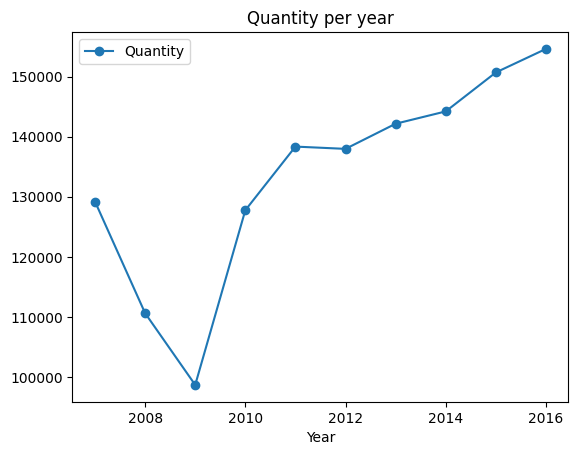

In [21]:
import matplotlib as plt

df_quantity_year_filtered.plot(kind="line", x="Year", y="Quantity", marker="o", title="Quantity per year")

### c. Draw a line chart of average CO2 emissions for same years that as in b)

In [22]:
df_avg_co2_year = duckdb.query("""
    SELECT Year, AVG(Avg_CO2) AS Avg_CO2
    FROM df
    GROUP BY Year
    HAVING COUNT(*) = 12
    ORDER BY Year
""").df()
df_avg_co2_year

,Year,Avg_CO2
0,2007,159.000000
1,2008,158.000000
2,2009,150.916667
3,2010,140.666667
4,2011,134.000000
5,2012,129.916667
6,2013,123.000000
7,2014,110.416667
8,2015,99.750000
9,2016,93.333333


<Axes: title={'center': 'Average CO2 per year'}, xlabel='Year'>

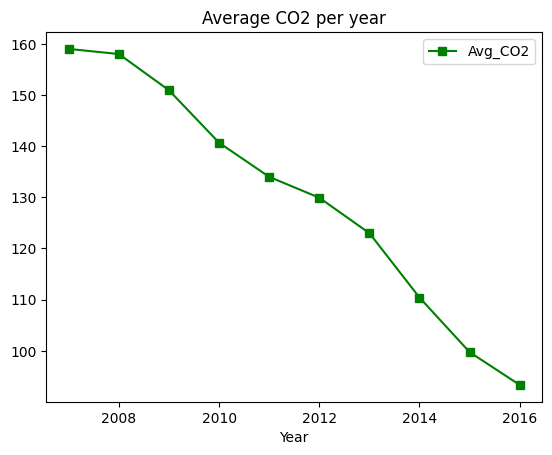

In [23]:
df_avg_co2_year.plot(kind="line", x="Year", y="Avg_CO2", marker="s", title="Average CO2 per year", color="green")


### d. Draw a line chart of all years and months for import

In [24]:
df_import_month = duckdb.query("""
    SELECT Year, Month, Import
    FROM df
    ORDER BY Year, Month
""").df()
df_import_month

,Year,Month,Import
0,2007,1,2276
1,2007,2,1992
2,2007,3,2626
3,2007,4,2220
4,2007,5,2881
...,...,...,...
116,2016,9,1526
117,2016,10,1365
118,2016,11,1305
119,2016,12,1137


In [26]:
df_import_month["Date"] = df_import_month["Year"].astype(str) + "-" + df_import_month["Month"].astype(str)

<Axes: title={'center': 'Monthly import'}, xlabel='Date'>

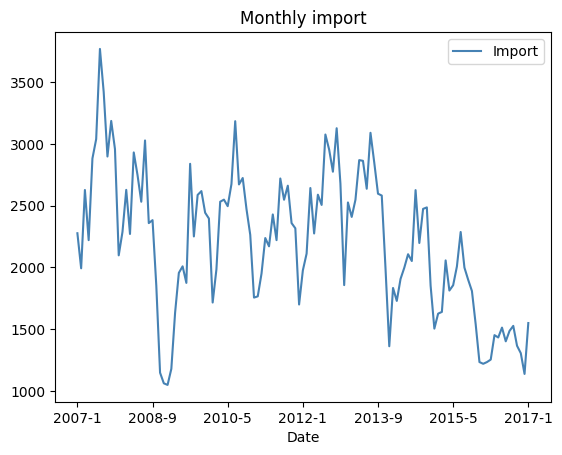

In [29]:
df_import_month.plot(kind="line", x="Date", y="Import", title="Monthly import", color="steelblue")

### e. Draw a line chart of all years and months for average CO2 emissions

In [30]:
df_co2_month = duckdb.query("""
    SELECT Year, Month, Avg_CO2
    FROM df
    ORDER BY Year, Month
""").df()
df_co2_month

,Year,Month,Avg_CO2
0,2007,1,152
1,2007,2,156
2,2007,3,159
3,2007,4,160
4,2007,5,160
...,...,...,...
116,2016,9,88
117,2016,10,91
118,2016,11,88
119,2016,12,98


<Axes: title={'center': 'Monthly Average CO2'}, xlabel='Date'>

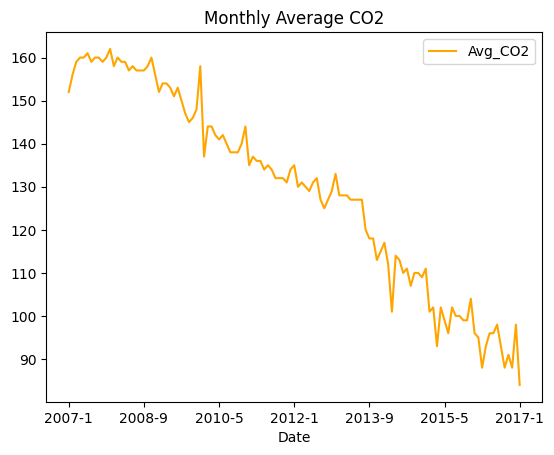

In [31]:
df_co2_month["Date"] = df_co2_month["Year"].astype(str) + "-" + df_co2_month["Month"].astype(str)

df_co2_month.plot(kind="line", x="Date", y="Avg_CO2", title="Monthly Average CO2", color="orange")

### f. Draw a line chart of all years and months for electric cars import

In [32]:
df_import_electric_month = duckdb.query("""
    SELECT Year, Month, Import_Electric
    FROM df
    WHERE Import_Electric IS NOT NULL
    ORDER BY Year, Month
""").df()
df_import_electric_month

,Year,Month,Import_Electric
0,2012,9,33.0
1,2012,10,49.0
2,2012,11,58.0
3,2012,12,71.0
4,2013,1,95.0
5,2013,2,83.0
6,2013,3,96.0
7,2013,4,122.0
8,2013,5,127.0
9,2013,6,156.0


<Axes: title={'center': 'Monthly Electric Car Imports'}, xlabel='Date'>

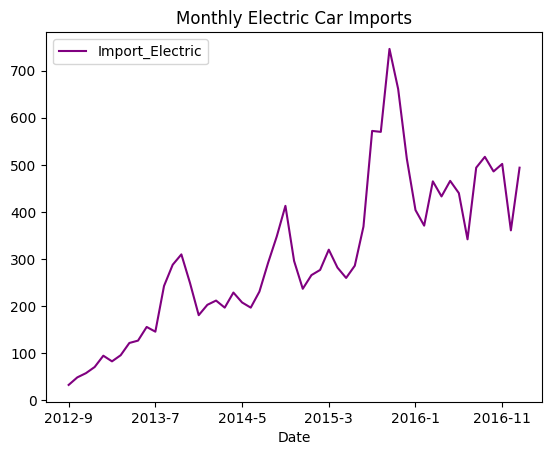

In [33]:
df_import_electric_month["Date"] = df_import_electric_month["Year"].astype(str) + "-" + df_import_electric_month["Month"].astype(str)

df_import_electric_month.plot(kind="line", x="Date", y="Import_Electric", title="Monthly Electric Car Imports", color="purple")

### g. Draw a line chart of average diesel share per year

In [34]:
df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

In [39]:
df_diesel_share = duckdb.query("""
    SELECT Year, AVG(Diesel_Share) AS Avg_Diesel_Share
    FROM df
    WHERE Diesel_Share IS NOT NULL AND Import IS NOT NULL AND Import > 0
    GROUP BY Year
    HAVING COUNT(*) = 12
    ORDER BY Year
""").df()
df_diesel_share

,Year,Avg_Diesel_Share
0,2007,74.216667
1,2008,72.300000
2,2009,72.241667
3,2010,74.875000
4,2011,75.550000
5,2012,64.391667
6,2013,52.933333
7,2014,48.783333
8,2015,40.991667
9,2016,31.691667


<Axes: title={'center': 'Average Diesel Share per Year'}, xlabel='Year'>

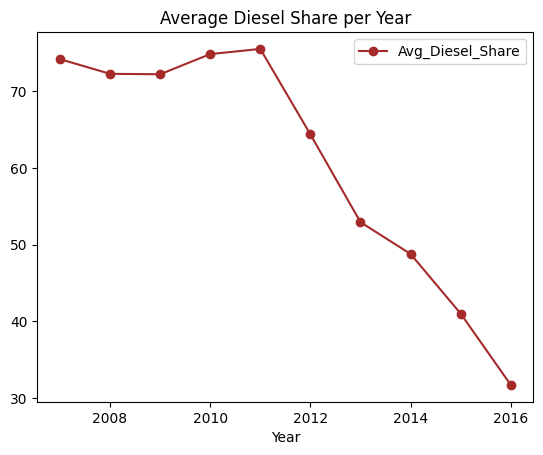

In [38]:
df_diesel_share.plot(x="Year", y="Avg_Diesel_Share", kind="line", marker="o", title="Average Diesel Share per Year", color="brown")

### h. Discuss some findings with a friend based on this dataset, and do plot more graphs

In [40]:
df["Electric_Share"] = df["Quantity_Electric"] / df["Quantity"]

In [41]:
df["Diesel_Share_Calc"] = df["Quantity_Diesel"] / df["Quantity"]

In [42]:
df_fuel_share = duckdb.query("""
    SELECT Year,
           AVG(Electric_Share) AS Avg_Electric_Share,
           AVG(Diesel_Share_Calc) AS Avg_Diesel_Share
    FROM df
    WHERE Quantity > 0
    GROUP BY Year
    HAVING COUNT(*) = 12
    ORDER BY Year
""").df()
df_fuel_share

,Year,Avg_Electric_Share,Avg_Diesel_Share
0,2007,NaN,0.742151
1,2008,NaN,0.724914
2,2009,NaN,0.722371
3,2010,NaN,0.748757
4,2011,0.014198,0.755495
5,2012,0.028632,0.643938
6,2013,0.055105,0.529337
7,2014,0.124575,0.487826
8,2015,0.170572,0.409916
9,2016,0.156023,0.316918


<Axes: title={'center': 'El vs Diesel – Andel per år'}, xlabel='Year'>

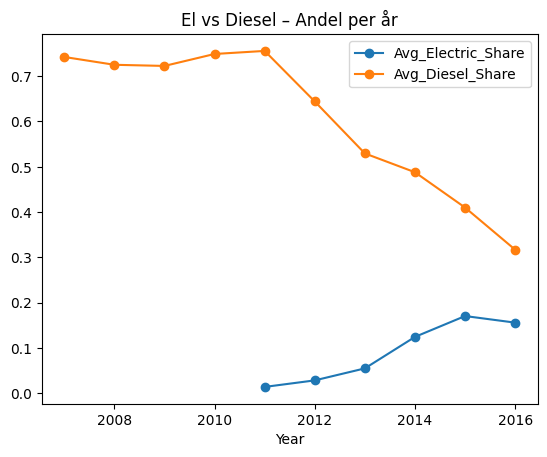

In [43]:
df_fuel_share.plot(
    x="Year", 
    y=["Avg_Electric_Share", "Avg_Diesel_Share"], 
    kind="line", 
    marker="o", 
    title="El vs Diesel – Andel per år"
)

In [44]:
df_hybrid = duckdb.query("""
    SELECT Year, Month, Quantity_Hybrid
    FROM df
    WHERE Quantity_Hybrid IS NOT NULL
    ORDER BY Year, Month
""").df()
df_hybrid

,Year,Month,Quantity_Hybrid
0,2011,1,439.0
1,2011,2,257.0
2,2011,3,466.0
3,2011,4,388.0
4,2011,5,357.0
...,...,...,...
68,2016,9,3991.0
69,2016,10,3209.0
70,2016,11,3181.0
71,2016,12,2597.0


<Axes: title={'center': 'Import av Hybridbilar över tid'}, xlabel='Date'>

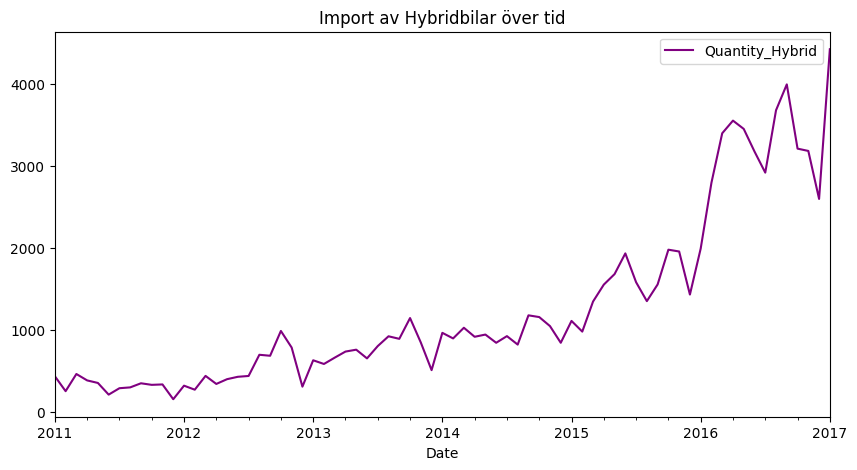

In [46]:
df_hybrid["Date"] = pd.to_datetime(df_hybrid["Year"].astype(str) + "-" + df_hybrid["Month"].astype(str))

df_hybrid.plot(
    x="Date", 
    y="Quantity_Hybrid", 
    kind="line", 
    title="Import av Hybridbilar över tid", 
    color="purple", 
    figsize=(10, 5)
)

In [47]:
df_co2_types = duckdb.query("""
    SELECT Year,
           AVG(Bensin_Co2) AS Bensin_CO2,
           AVG(Diesel_Co2) AS Diesel_CO2
    FROM df
    GROUP BY Year
    HAVING COUNT(*) = 12
    ORDER BY Year
""").df()
df_co2_types

,Year,Bensin_CO2,Diesel_CO2
0,2007,160.833333,158.500000
1,2008,159.250000,158.750000
2,2009,148.000000,152.416667
3,2010,138.666667,142.166667
4,2011,131.250000,136.833333
5,2012,129.166667,136.666667
6,2013,123.833333,135.250000
7,2014,119.500000,133.416667
8,2015,118.333333,131.666667
9,2016,111.833333,130.250000


<Axes: title={'center': 'CO₂-utsläpp: Bensin vs Diesel'}, xlabel='Year'>

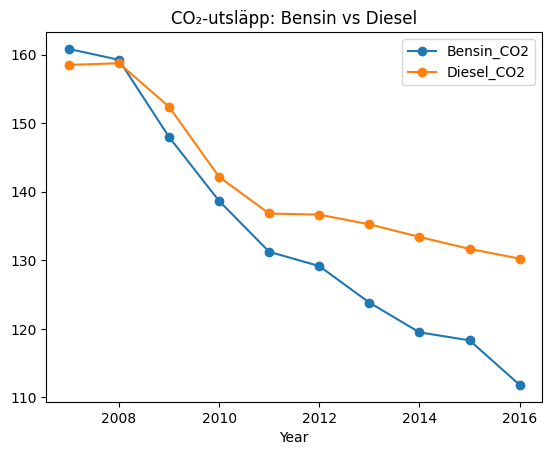

In [48]:
df_co2_types.plot(
    x="Year", 
    y=["Bensin_CO2", "Diesel_CO2"], 
    kind="line", 
    marker="o", 
    title="CO₂-utsläpp: Bensin vs Diesel"
)